<a href="https://colab.research.google.com/github/realdanielalexander/diamonds_bangkit/blob/master/Diamonds_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['diamonds.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving diamonds.csv to diamonds.csv


In [0]:
data = pd.read_csv("diamonds (1).csv")
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [0]:
data_reg = data[['carat', 'price']].copy()
data_reg

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


In [4]:
df2.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


We found that correlation between carrat with price and volume (x,y,z) are the highest. But, we decided to only chose 2 features so we chose carrat and price.

In [0]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data_reg)
data_scaled

array([[-0.59993139, -0.48427494],
       [-0.72936643, -0.48427494],
       [-0.59993139, -0.4828514 ],
       [-0.21162628, -0.4728866 ],
       [-0.08219125, -0.47146306],
       [-0.53521387, -0.47003951],
       [-0.53521387, -0.47003951],
       [-0.40577884, -0.46861597],
       [-0.66464891, -0.46861597],
       [-0.59993139, -0.46719243],
       [-0.14690877, -0.46576889],
       [-0.59993139, -0.46434534],
       [-0.66464891, -0.46149826],
       [-0.08219125, -0.45865117],
       [-0.79408394, -0.45722763],
       [-0.01747373, -0.45722763],
       [-0.14690877, -0.452957  ],
       [-0.14690877, -0.44868638],
       [-0.14690877, -0.44868638],
       [-0.14690877, -0.44868638],
       [-0.14690877, -0.44868638],
       [-0.59993139, -0.44726283],
       [-0.59993139, -0.44583929],
       [-0.08219125, -0.44583929],
       [-0.08219125, -0.44583929],
       [-0.59993139, -0.44441575],
       [-0.53521387, -0.44299221],
       [-0.14690877, -0.44014512],
       [-0.59993139,

In [0]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [0]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = data_reg['carat'][-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 774954.9375 - root_mean_squared_error: 967.8698
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1168150.7500 - root_mean_squared_error: 967.1381
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 762848.4375 - root_mean_squared_error: 966.5538
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 770170.8750 - root_mean_squared_error: 966.1449
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 1174860.2500 - root_mean_squared_error: 965.7319
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 774144.0625 - root_mean_squared_error: 965.2553
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 775681.3750 - root_mean_squared_error: 964.8832
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 774947.3125 - root_mean_squared_error: 964.5052
Epoch 9/100
4/4 [=============================

KeyError: ignored

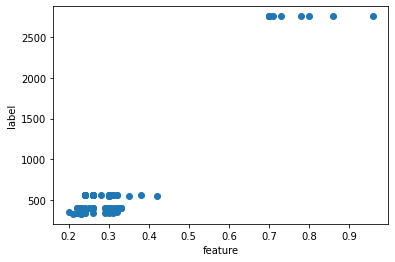

In [0]:
learning_rate=0.1
epochs= 100
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, data_reg['carat'], 
                                                        data_reg['price'], epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, data_reg['carat'], data_reg['price'])
plot_the_loss_curve(epochs, rmse)

Text(0, 0.5, 'Price')

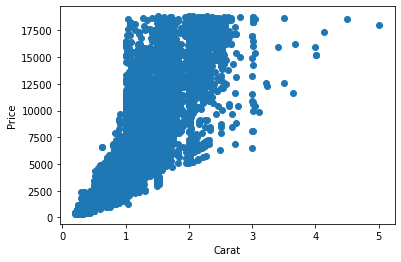

In [0]:
plt.scatter(data_reg['carat'], data_reg['price'])
plt.xlabel("Carat")
plt.ylabel("Price")